# Lab 5 - Exploratory Data Analysis

In [1]:
# % matplotlib inline

In [2]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from tabulate import tabulate

import statsmodels.api as sm

sns.set(style="whitegrid")

# 1 Insurance - Overview
Our goal in this EDA is to familiarize ourselves with the data, and to prepare to answer the question of what factors influence charges. We use this question to guide the EDA. We begin by performing single variable EDA, then we will explore pairwise relationships.

First, we must import the csv so we can read it. We use Pandas for this.

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/insurance.csv")

Now that we have imported the data, we need to find out all the variables we need to examine. We use .info() to see all the variables and their datatypes. 

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We note that there are no null values in the data, and each variable occurs 1338 times, which is the same as the total count. It appears that this data is already relatively clean. We can see that the variables in this data set are 'age', 'sex', 'bmi', 'children', 'smoker', 'region' and 'charges'. 

We also run insurance.head() to see some possible values for our data.

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Some of the representations of the data match our expectations. The domain of 'sex' is 'male' and 'female', smoker is 'yes' or 'no'. 

One interesting thing we note is that charges are floats with more than two decimal places, which doesn't make sense for monetary values. We will leave it be for now. We also note the domain for 'region' is limited to cardinal directions such as 'southwest' and 'southeast'. Also, 'bmi' is a float with three decimal places.

Now we can begin to think about some pairwise comparisons we will want to examine. We can use both our guiding question and our domain knowledge to come up with some comparisons that we think will be significant. 

1. age $\rightarrow$ charges
2. sex $\rightarrow$ charges
3. bmi $\rightarrow$ charges
4. children $\rightarrow$ charges
5. smoker $\rightarrow$ charges
6. region $\rightarrow$ charges

Next we will perform single variable EDA for each variable.

# 2 Insurance - Single Variables

## 2.1 age

Age is the age of the person in question. It is an ordered numerical variable. We don't have birth dates, so age is the only value we have to go on, and it only informs us about the age of the person at the time the data was created. 

To get a sense of the ages we are looking at, we can calculate the value counts. We expect to see fewer smaller ages, and fewer much older ages, with a majority of ages being around 30-50.

In [6]:
age_counts = insurance["age"].value_counts().sort_index()
pd.DataFrame({"Age": age_counts.index, "Count": age_counts.values})

,Age,Count
0,18,69
1,19,68
2,20,29
3,21,28
4,22,28
5,23,28
6,24,28
7,25,28
8,26,28
9,27,28


We see a large number of different ages, and the data appears to be somewhat evenly distributed, except for a large uptick at ages 18 and 19. It is hard to say yet why there is a large spike at ages 18 and 19, but we will take note of it. Our prediction does not seem to have held up, as the two youngest ages of 18 and 19 have considerably more entries than the rest. 

Let's chart the data to put it in perspective.

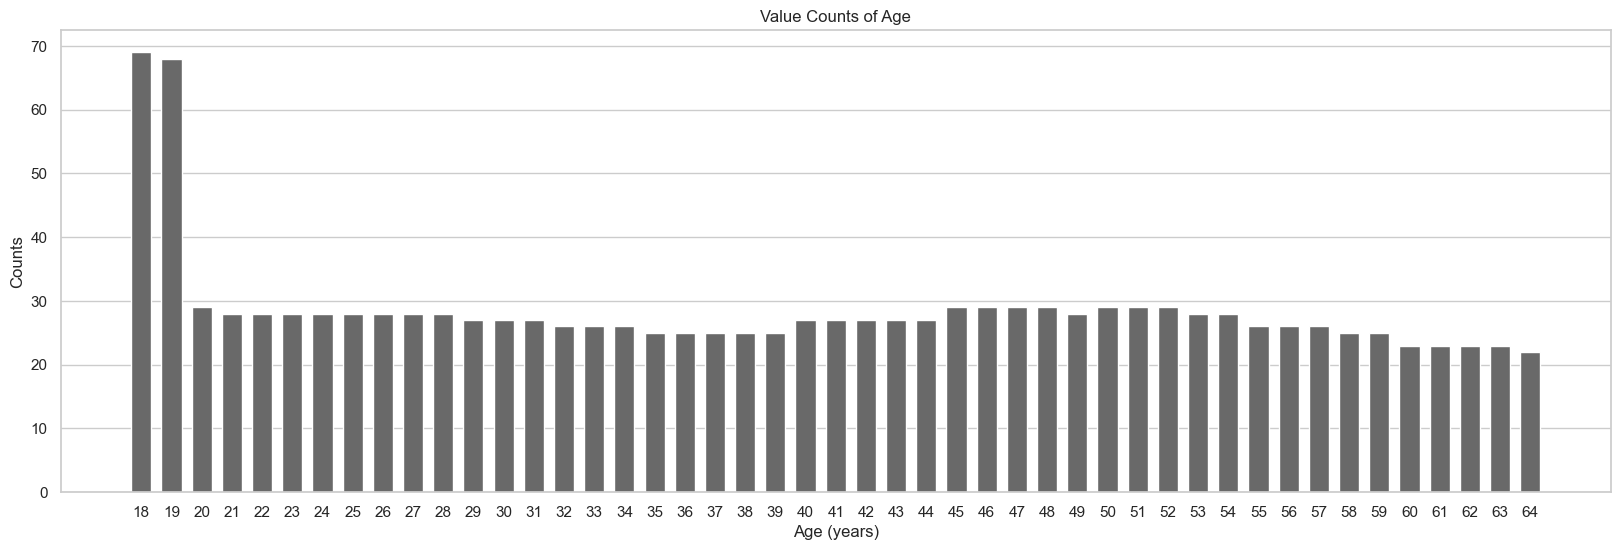

In [7]:
counts = insurance["age"].value_counts().sort_index()
x = range( len( counts))
width = 1/1.5
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(x, counts, width, color="dimgray", align="center")
axes.set_xticks(x)
axes.set_xticklabels(counts.axes[0])
axes.set_title( "Value Counts of Age")
axes.set_xlabel("Age (years)")
axes.set_ylabel( "Counts")
axes.xaxis.grid(False)
plt.show()
plt.close()

The spike in counts for ages 18 and 19 is even more pronounced when shown graphically. The other ages apear to be somewhat evenly distributed, with maybe a small dip starting at age 53 and going to age 64. 

## 2.2 sex

Sex is a categorical variable that can only take on one of two values: "male" and "female". It is an important characteristic of a person in this dataset. Let's check the value counts of the 'sex' variable. We predict that there are roughly an equal amount of 'male' and 'female' sexes in the data.

In [8]:
pd.DataFrame(insurance["sex"].value_counts().sort_index())

,sex
female,662
male,676


We can see that our hypothesis is true; there are roughly an equal amount of 'male' and 'female' sexes in our data set. Because there are only two possible values for this variable, there is not much else we can find out about it. Plotting 'sex' does not seem necessary.

## 2.3 bmi

'bmi' is another characteristic of a person that is included in this data set. It stands for "body mass index", which is a continuous numerical value that is derived from a person's weight and height. It is used to classify people into categories of 'underweight', 'normal weight', 'overweight' and 'obese'. In the United States, common ranges for these categories are as follows:

- 'underweight': <18.5
- 'normal_weight': 18.5 to <25
- 'overweight': 25.0 to <30
- 'obese': 30 or higher

Below we plot the data using a box and whiskers chart to get a sense of the distribution.

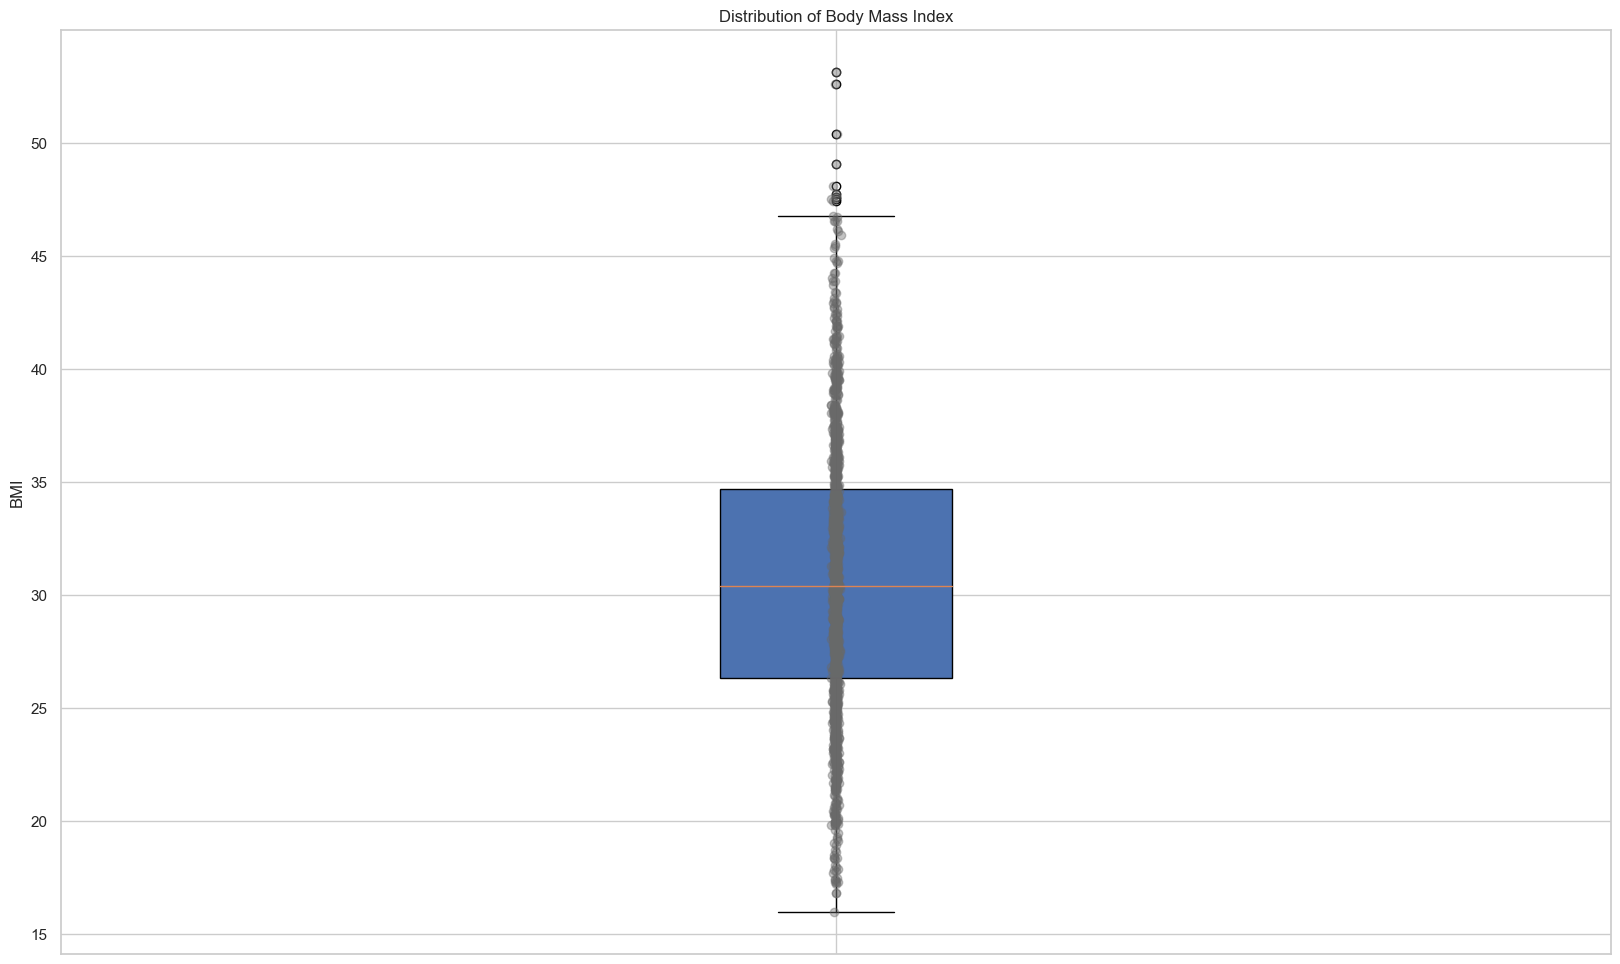

In [9]:
figure = plt.figure(figsize=(20, 12))
axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(insurance["bmi"], labels=[''], showfliers=True, patch_artist=True)
# eda.restyle_boxplot( patch)
axes.set_title("Distribution of Body Mass Index")
axes.set_ylabel("BMI")
x = np.random.normal(1, 0.001, size=len(insurance["bmi"]))
axes.plot(x, insurance["bmi"], 'o', alpha=0.4, color="DimGray", zorder=2)
plt.show()
plt.close()

The box and whiskers plot above shows the distribution, but there are many overlapping values. To get a better sense of the distribution, we can chart our data using a bar chart. However, because 'bmi' is a continuous numerical variable, charting our data for each value will be difficult to interpret. Thus, we can use a histogram to show the distribution instead.

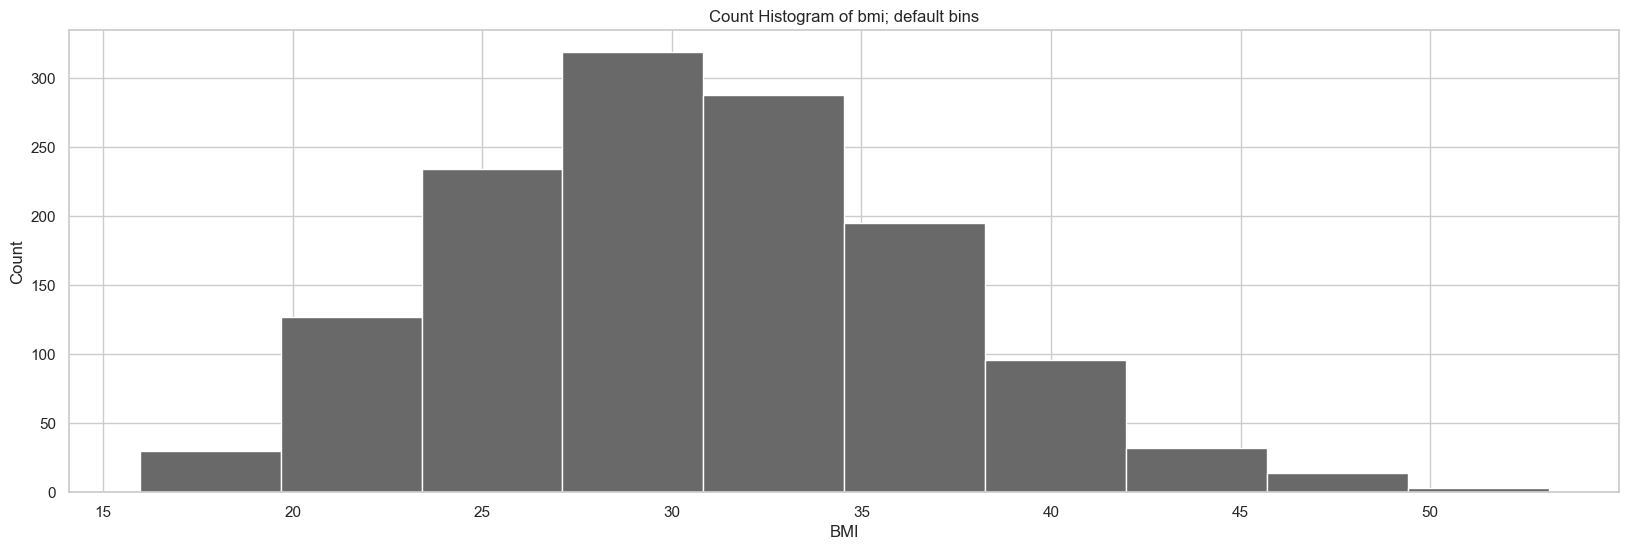

In [10]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(insurance["bmi"], color="DimGray")
axes.set_xlabel( "BMI")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of bmi; default bins")
plt.show()
plt.close()

This histogram does a good job of showing the distribution of bmi values. We can see that many respondants fall in the 'obese' range. To get a better sense of how many people are obese, we can add a column in our data called 'bmi_class' to categorize each person by bmi. First we define a function to determine bmi category:

In [11]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 24.9:
        return 'normal_weight'
    elif 24.9 <= bmi < 29.9:
        return 'overweight'
    else:
        return 'obese'

This function takes bmi as input and outputs the bmi category. 

Next we add the new column to our dataframe and print out the head to show that our new column has been added:

In [12]:
# Add a new column 'bmi_class' based on 'bmi' column
insurance['bmi_class'] = insurance['bmi'].apply(categorize_bmi)
insurance.head()

,age,sex,bmi,children,smoker,region,charges,bmi_class
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal_weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight


We can see the new 'bmi_class' column with corresponding bmi categories.

Now we can start to visualize our data a bit more. We can chart the number of people by bmi_class. It is difficult to predict which classes will be the most common, but we can say that we expect most people fall within normal_weight and overweight, rather than the two extremes: underweight and obese.

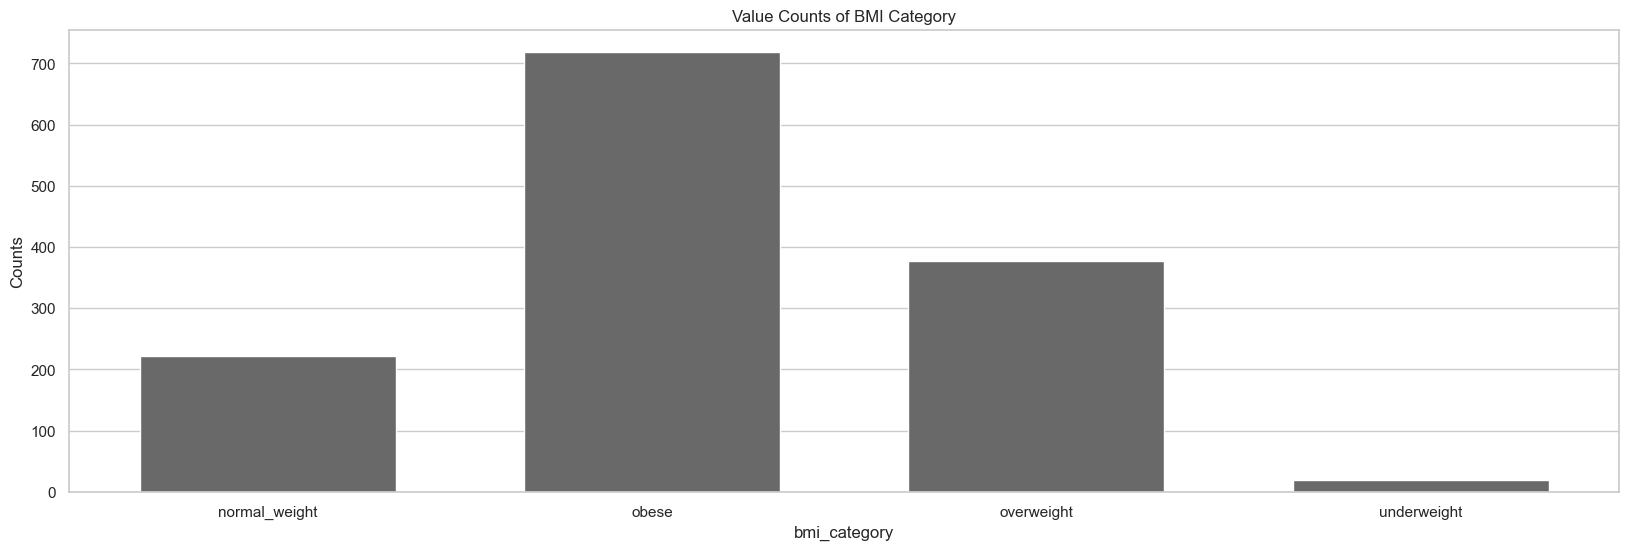

In [13]:
counts = insurance["bmi_class"].value_counts().sort_index()
x = range( len( counts))
width = 1/1.5
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(x, counts, width, color="dimgray", align="center")
axes.set_xticks(x)
axes.set_xticklabels(counts.axes[0])
axes.set_title( "Value Counts of BMI Category")
axes.set_xlabel("bmi_category")
axes.set_ylabel( "Counts")
axes.xaxis.grid(False)
plt.show()
plt.close()

After charting our categorical data, the results are striking. A large number of the people represented by the data are obese. Our prediction was off, as we did not foresee there being so many obese respondants. The value counts chart does a good job of highlighting the large number of obese people in the data, but we can also normalize the counts to get percentages to put these numbers into perspective.

In [14]:
pd.DataFrame(insurance["bmi_class"].value_counts(normalize=True).sort_index())

,bmi_class
normal_weight,0.165919
obese,0.537369
overweight,0.281764
underweight,0.014948


After plotting the normalized distribution, we see that 53.7%, more than half, of the surveyed people are obese. We expect a chart of the normalized distribution to look roughly the same as the value counts chart, but with percentage values on the y-axis instead of counts.

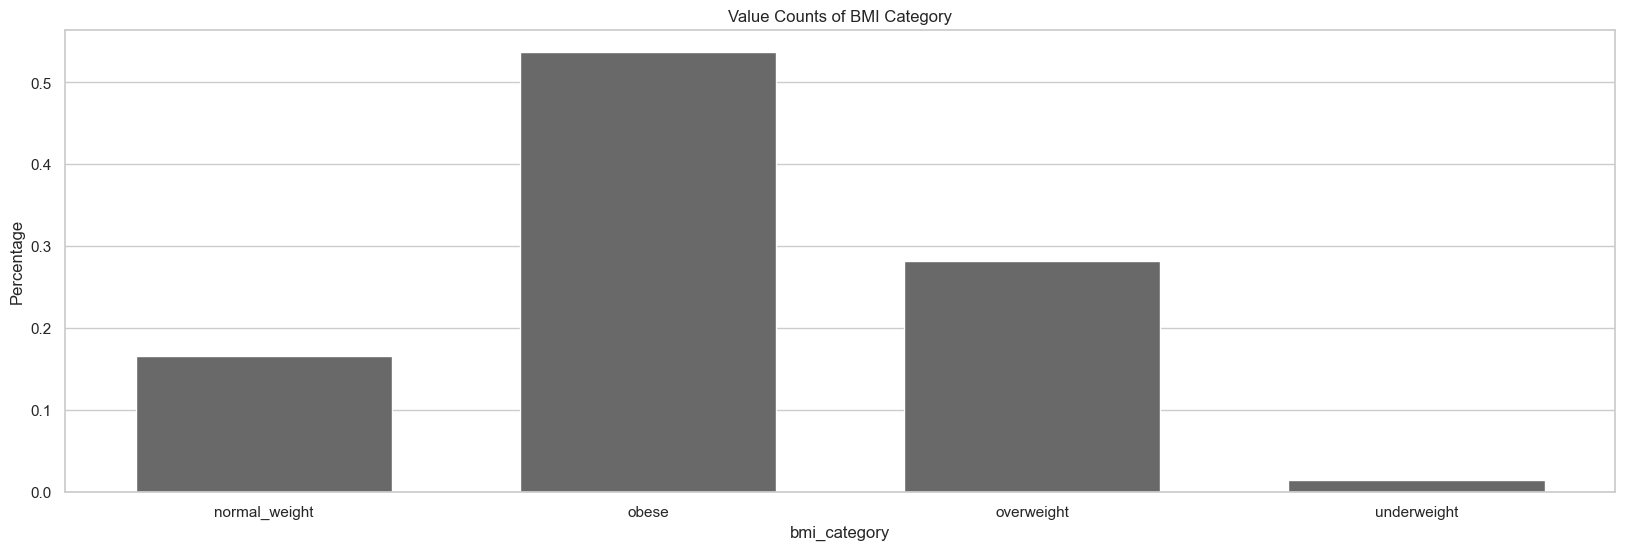

In [15]:
counts = insurance["bmi_class"].value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(x, counts, width, color="dimgray", align="center")
axes.set_xticks(x)
axes.set_xticklabels(counts.axes[0])
axes.set_title( "Value Counts of BMI Category")
axes.set_xlabel("bmi_category")
axes.set_ylabel( "Percentage")
axes.xaxis.grid(False)
plt.show()
plt.close()

The normalized chart does look similar to the value counts chart, and doesn't really give us new information.

## 2.4 children

The 'children' variable is the number of children that each respondant has. It is a numerical variable. We can check the value counts first to get a sense of the variable. We expect that a majority of people have zero children, and as number of children increases, the count decreases.

In [16]:
children_counts = insurance["children"].value_counts().sort_index()
pd.DataFrame({"# Children": children_counts.index, "Count": children_counts.values})

,# Children,Count
0,0,574
1,1,324
2,2,240
3,3,157
4,4,25
5,5,18


We can see that our hypothesis was correct. The majority of people have zero children, and as children goes up, the count decreases. We chart this data to help visualize the trend.

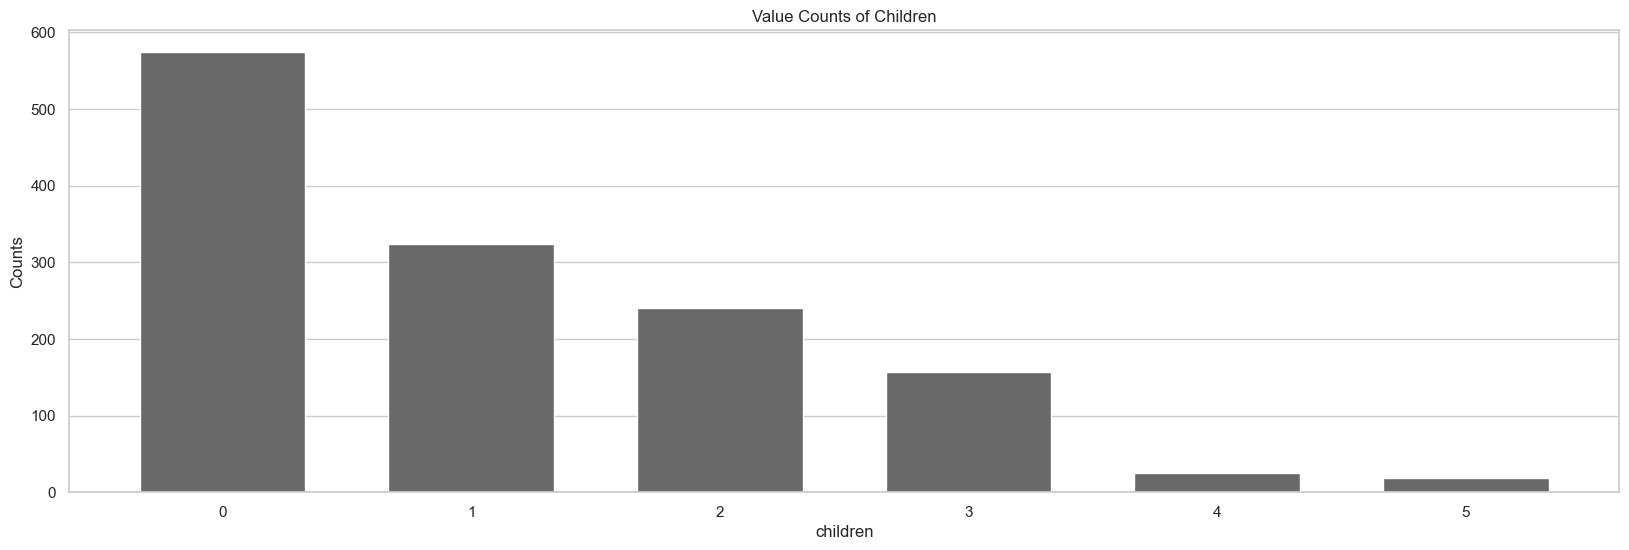

In [17]:
counts = insurance["children"].value_counts().sort_index()
x = range( len( counts))
width = 1/1.5
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(x, counts, width, color="dimgray", align="center")
axes.set_xticks(x)
axes.set_xticklabels(counts.axes[0])
axes.set_title( "Value Counts of Children")
axes.set_xlabel("children")
axes.set_ylabel( "Counts")
axes.xaxis.grid(False)
plt.show()
plt.close()

The bar chart shows the trend of decreasing frequency of having more children.

## 2.5 smoker

The 'smoker' variable is a categorical variable. We can also say it is a binary variable because it can only take on the two values of 'yes' (1) or 'no' (0). We can see the distribution using value counts. We predict that a majority of people are not smokers.

In [18]:
smoker_counts = insurance["smoker"].value_counts().sort_index()
pd.DataFrame({"Smoker": smoker_counts.index, "Count": smoker_counts.values})

,Smoker,Count
0,no,1064
1,yes,274


The value counts table does support our hypothesis, as there are more non-smokers than smokers by a wide margin. We can get a percentage by normalizing the value counts.

In [19]:
smoker_counts = insurance["smoker"].value_counts(normalize=True).sort_index()
pd.DataFrame({"Smoker": smoker_counts.index, "Percent": smoker_counts.values})

,Smoker,Percent
0,no,0.795217
1,yes,0.204783


We can see that 80% of the surveyed people are non-smokers, while the other 20% are smokers. 

## 2.6 region

Region is the region where a given person lives. It is a categorical variable. To get a sense of the domain of the 'region' variable, we print a table of the value counts. 

In [20]:
region_counts = insurance["region"].value_counts().sort_index()
pd.DataFrame({"Region": region_counts.index, "Count": region_counts.values})

,Region,Count
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


We see that the domain is four regions. Since there is no data dictionary accompanying this data set, we do not know which regions these are. We make the assumption that this data set relates to people in the United States, which would mean that each of these four regions is a different quadrant of the US. We can still continue our EDA without knowing this fact for certain.

We also observe that the counts are almost uniformly distributed between each region, with just a slight majority in the southeast. To put this bump into perspective, we can use a bar chart. 

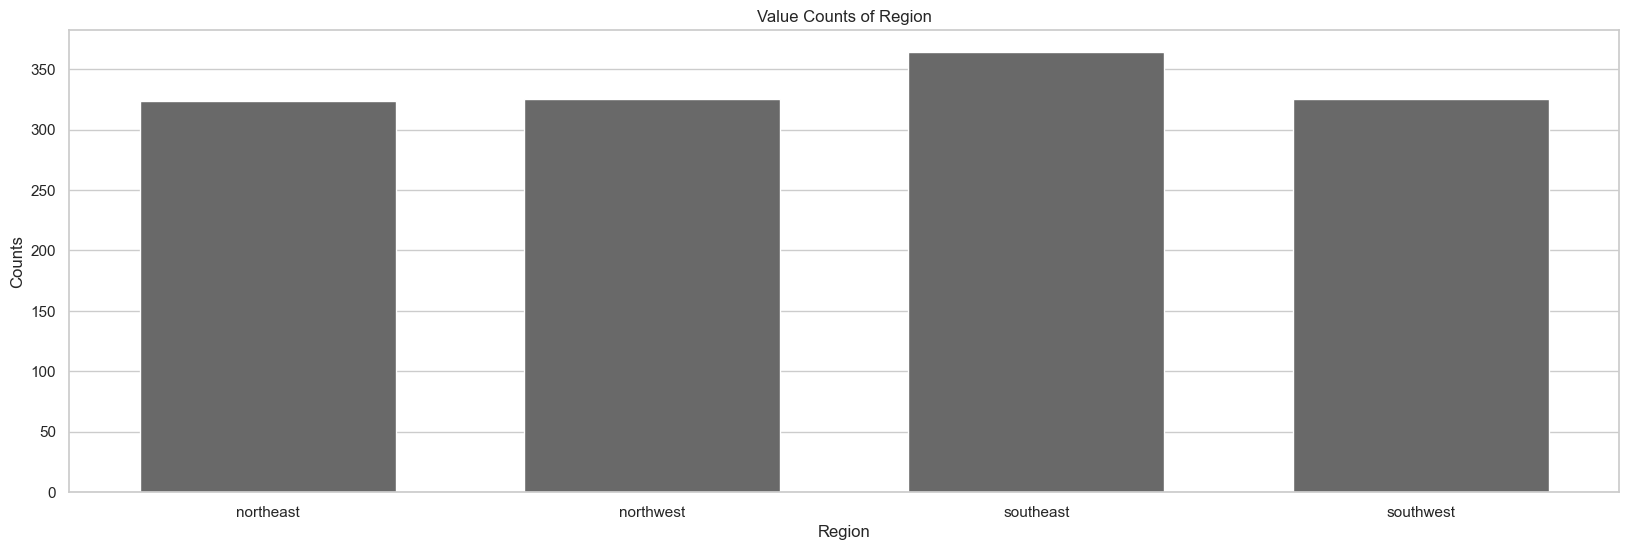

In [21]:
counts = insurance["region"].value_counts().sort_index()
x = range( len( counts))
width = 1/1.5
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(x, counts, width, color="dimgray", align="center")
axes.set_xticks(x)
axes.set_xticklabels(counts.axes[0])
axes.set_title( "Value Counts of Region")
axes.set_xlabel("Region")
axes.set_ylabel( "Counts")
axes.xaxis.grid(False)
plt.show()
plt.close()

For the time being, it is unclear why there is a spike in the southeast. We guess that this fact won't be significant going forward, yet we still take note. 

## 2.7 charges

Charges is our target variable. It is a continuous numerical variable and we expect it to be measured in dollars. We expect the charges to be mostly small and medium size, with fewer very large charges. As for exactly what the variable represents, it is difficult to know. The word "charges" is vague, and could mean several things. Given the fact that each person has 'charges' assocaited with them, it would make sense that it is the summation of all historical charges for a given person, rather than a one-time charge. 

We can get a sense of the distribution of the data using the describe() method.

In [22]:
insurance["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

As we noted in the Overview, the 'charges' values have more than two decimal places. Because these are meant to be dollar amounts, we can round to two decimal places.

In [23]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
insurance["charges"].describe()

count    1338.00
mean    13270.42
std     12110.01
min      1121.87
25%      4740.29
50%      9382.03
75%     16639.91
max     63770.43
Name: charges, dtype: float64

Immediately we note that the max is far greater than the 75% value. This means that there are some values that may be considered extreme. This is in line with what we expected. Still, we can get a better idea of the data by using a histogram. 

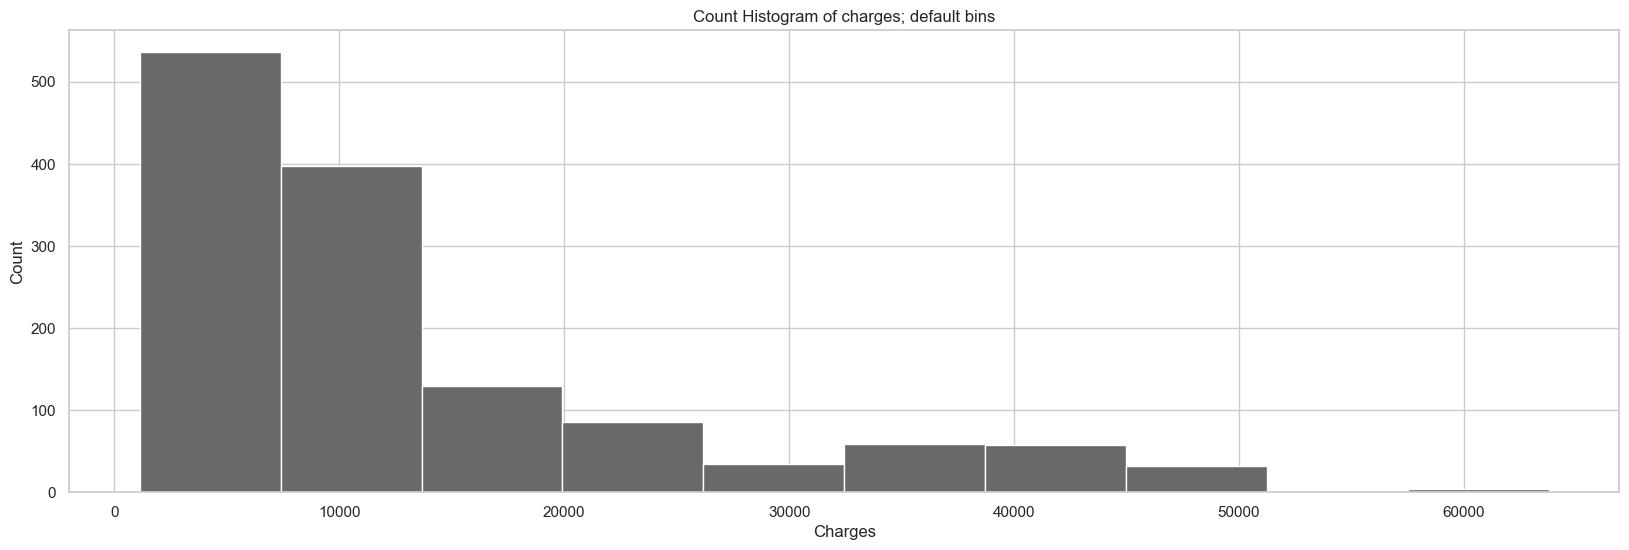

In [24]:
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(insurance["charges"], color="DimGray")
axes.set_xlabel( "Charges")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of charges; default bins")
plt.show()
plt.close()

Our prediction still seems to be correct, as a large number of charges are smaller, and relatively few are large. 

However, we have used only default bins in the above histogram, so it is possible we are missing information in the data. We can try making another histogram but manually increasing the number of bins.

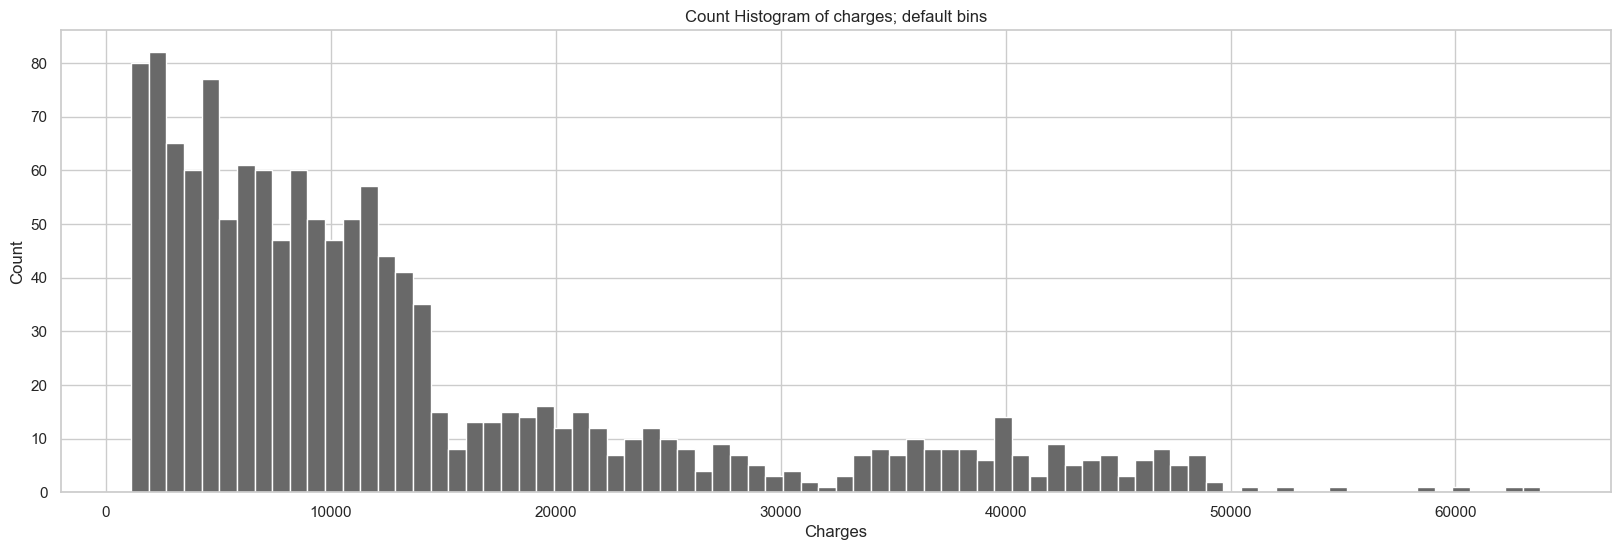

In [25]:
bin_edges = [0, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000, 11250, 12500, 13750, 15000, 16250, 17500, 18750, 20000, 21250, 22500, 23750, 25000, 26250, 27500, 28750, 30000, 31250, 32500, 33750, 35000, 36250, 37500, 38750, 40000, 41250, 42500, 43750, 45000, 46250, 47500, 48750, 50000]
num_bins = 80
figure = plt.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(insurance["charges"], bins=num_bins, color="DimGray")
axes.set_xlabel( "Charges")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of charges; default bins")
plt.show()
plt.close()

After increasing the number of bins from 10 to 80, there doesn't seem to be any new information found. The histogram takes roughly the same shape as the original with the default bins. 

As another way to visualize the data, we plot it using a box and whiskers plot.

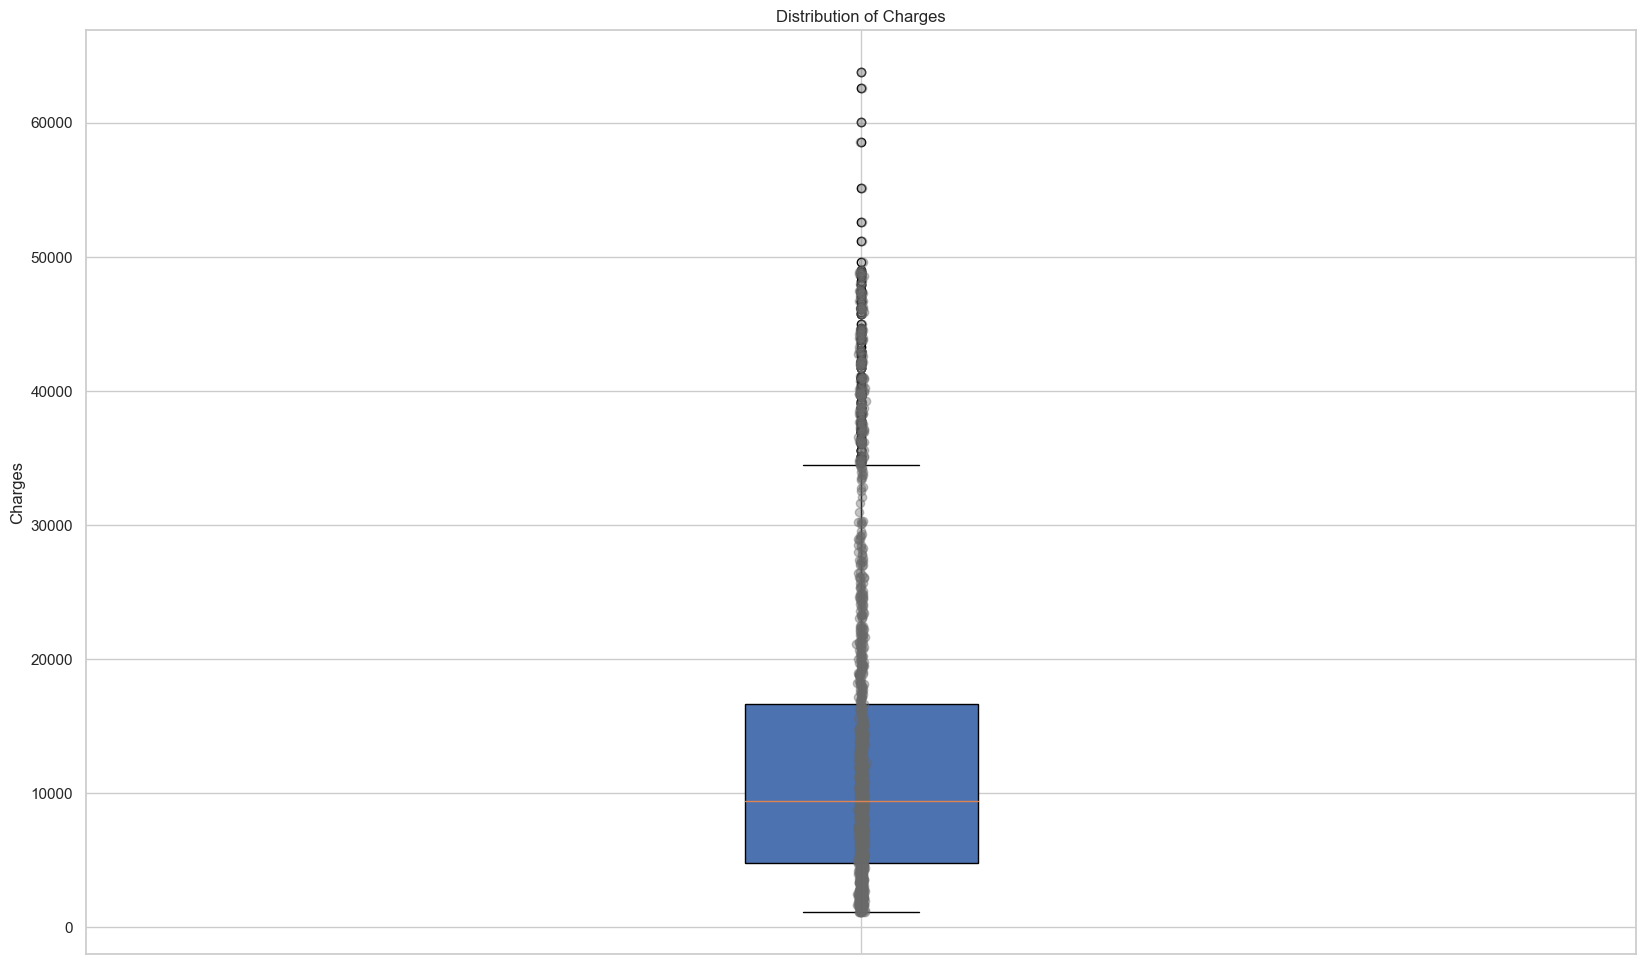

In [26]:
figure = plt.figure(figsize=(20, 12))
axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(insurance["charges"], labels=[''], showfliers=True, patch_artist=True)
# eda.restyle_boxplot( patch)
axes.set_title("Distribution of Charges")
axes.set_ylabel("Charges")
x = np.random.normal(1, 0.001, size=len(insurance["charges"]))
axes.plot(x, insurance["charges"], 'o', alpha=0.4, color="DimGray", zorder=2)
plt.show()
plt.close()

Using the box and whiskers plot shows us a slightly new perspective on the data that the histograms didn't underscore. We can see that there is a distinct grouping of values right around the 40000 range, along with the obvious grouping around the 10000 range. This is an interesting characteristic of the data that may have otherweise gone unnoticed. Perhaps the entity enforcing the charges has a pricing scheme that often charges in different increments.

After performing the pairwise EDA for 'age' and 'charges', we noticed a third distinct grouping. Here we are circling back to our single-variable EDA for 'charges' to see the three groupings better. We repeat the box plot above but this time add jitter to the x-axis and increase the length of the chart.

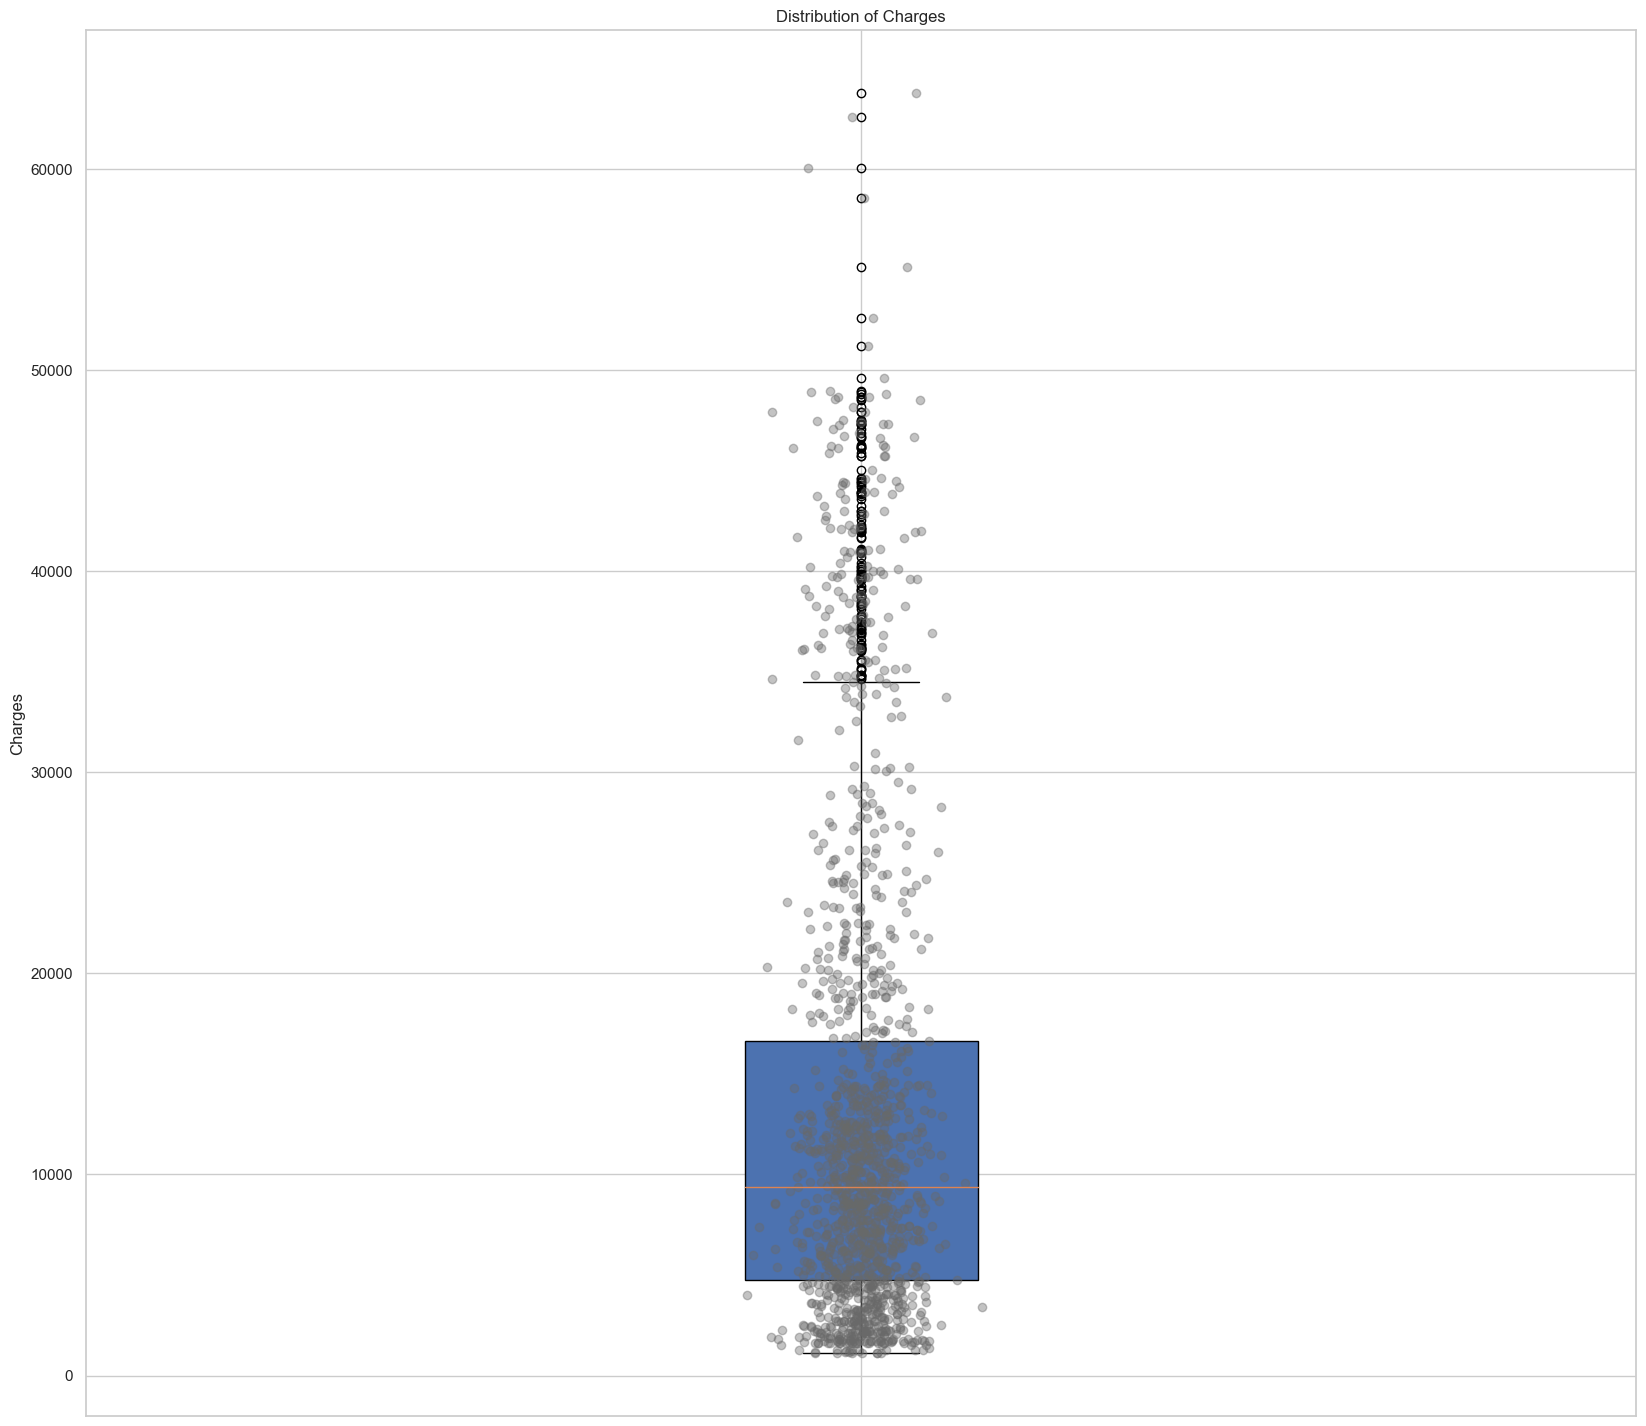

In [27]:
figure = plt.figure(figsize=(20, 18))
axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(insurance["charges"], labels=[''], showfliers=True, patch_artist=True)
axes.set_title("Distribution of Charges")
axes.set_ylabel("Charges")

#add jitter to the x-axis
x = np.random.normal(1, 0.001, size=len(insurance["charges"]))
jittered_x = x + np.random.normal(0, 0.02, size=len(insurance["charges"]))  # Adjust the jitter strength (0.02 in this case)

#plot
axes.plot(jittered_x, insurance["charges"], 'o', alpha=0.4, color="DimGray", zorder=2)

plt.show()
plt.close()

After adding jitter and increasing the chart length, we see the three groups more clearly. We hadn't noticed the third group during our first single variable EDA of 'charges', so we wanted to come back and document this discovery.

# 3 Insurance - Pairwise EDA

Below are some utility functions that we will use for our pairwise EDA.

The $classify\_correlation()$ function is used by the $correlation()$ function to classify which type of correlation exists between two variables. 

In [28]:
def classify_correlation(r):
    r = abs(r)
    if r < 0.16:
        return "very weak"
    if r < 0.29:
        return "weak"
    if r < 0.49:
        return "low"
    if r < 0.69:
        return "moderate"
    if r < 0.89:
        return "strong"
    return "very strong"

The $correlation()$ function calculates and prints Spearman's $\rho$ and Pearson's $r$ for two variables, including the correlation classification mentioned above. We can use these correlation coefficients to summarize the characteristics of two variables.

In [29]:
def correlation(data, x, y):
    print("Correlation coefficients:")
    r = stats.pearsonr(data[x], data[y])[0]
    print( "r   =", r, f"({classify_correlation(r)})")
    rho = stats.spearmanr(data[x], data[y])[0]
    print( "rho =", rho, f"({classify_correlation(rho)})")

The $describe\_by\_category()$ function will show descriptive statistics for a numerical variable by each value of the categorical variable.

In [30]:
def describe_by_category(data, numeric, categorical):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    print(grouped_y)

The $lowess\_scatter()$ function creates a LOESS scatter plot. This plot fits a smooth curve to the scatter plot data. It is essentially a way to add a trendline to our scatter plot, and is an important tool for pairwise EDA.

In [31]:
def lowess_scatter(data, x, y, jitter=0.0, skip_lowess=False):
    
    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10)
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3)
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]
    
    figure = plt.figure(figsize=(10, 6))
    
    axes = figure.add_subplot(1, 1, 1)
    
    xs = data[x]
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs( 0, 0.5, data[x].size)
    
    axes.scatter(xs, data[y], marker="o", color="DimGray", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")
    
    title = "Plot of {0} v. {1}".format(x, y)
    if not skip_lowess:
        title += " with LOWESS"
    axes.set_title(title)
    axes.set_xlabel(x)
    axes.set_ylabel(y)
    
    plt.show()
    plt.close()

The $multiboxplot()$ function plots a numerical variable and creates a box for each category of the categorical variable. It is the counterpart to the $describe\_by\_category()$ function.

In [32]:
def multiboxplot(data, numeric, categorical, skip_data_points=True):
    figure = plt.figure(figsize=(12, 6))
    
    axes = figure.add_subplot(1, 1, 1)
    
    grouped = data.groupby(categorical)
    labels = pd.unique(data[categorical].values)
    labels.sort()
    grouped_data = [grouped[numeric].get_group( k) for k in labels]
    patch = axes.boxplot( grouped_data, labels=labels, patch_artist=True, zorder=1)
#     eda.restyle_boxplot( patch)
    
    if not skip_data_points:
        for i, k in enumerate(labels):
            subdata = grouped[numeric].get_group( k)
            x = np.random.normal(i + 1, 0.01, size=len(subdata))
            axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)

    axes.set_xlabel(categorical)
    axes.set_ylabel(numeric)
    axes.set_title("Distribution of {0} by {1}".format(numeric, categorical))
    
    plt.show()
    plt.close()

## 3.1 age and charges

It would make sense for there to be some correlation between age and charges. Earlier we brought up the question of whether 'charges' accounts for all the charges for all time for a given person, rather than a single, one-time charge. If the former is true, it would follow that older people would have amassed more charges, and therefore have higher 'charge' values. To check if this holds any weight, let's check the correlation between age and charges.

In [33]:
correlation(insurance, "age", "charges")

Correlation coefficients:
r   = 0.2990081933306478 (low)
rho = 0.5343921337718459 (moderate)


Interestingly, the Pearson's $r$ value indicates a low correlation, while the Spearman's $\rho$ indicates a moderate correlation. We know that Pearson's $r$ is sensitive to extreme values, however, and we know that the 'charges' variable does contain extreme values. Thus, it is possible that these extreme values are decreasing the correlation coefficient to some degree. We also know that Spearman's $\rho$ is less sensitive to extreme values, as it deals with rank instead of value. It then makes sense that our $\rho$ value indicates a higher correlation between 'age' and 'charges'. We can conclude that there exists some correlation between 'age' and 'charges'. 

To visualize this correlation, we can look at a box plot. We can use this plotting technique because we can consider 'age' to be categorical, since it is a discrete numeric variable with a limited range.

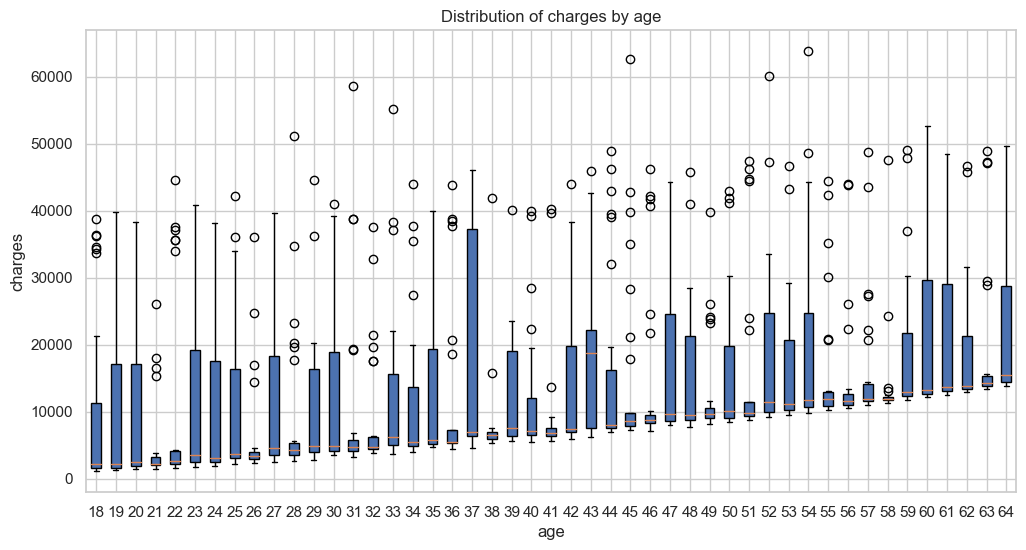

In [34]:
multiboxplot(insurance, "charges", "age")

What we see above is interesting. We notice a steady increase in the median charges values as age increases, indicating a correlation between 'age' and 'charges'. Looking at the $r$ and $\rho$ values gave us some indication of the correlation, but seeing it visually makes the correlation more clear. We also notice the many extreme values in the data, which are likely responsible for the low $r$ value. 

We can also try a scatter plot with a LOESS line below.

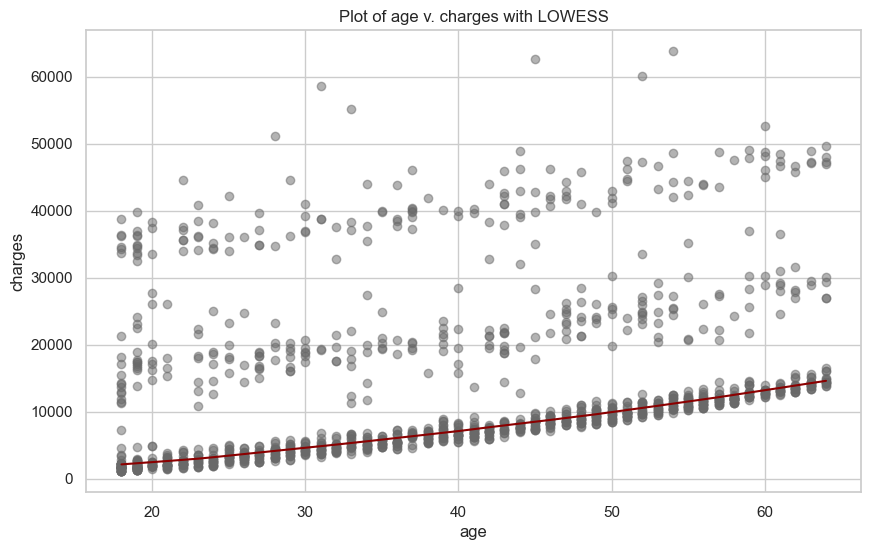

In [35]:
lowess_scatter(insurance, "age", "charges", jitter=0.0, skip_lowess=False)

Our plot shows a similar trend to the one spotted in the previous plot. We see very clearly that as age increases, so does charges. The increase seems almost linear but very slightly curved upwards as well. 

However, this is not the most significant finding from this chart. What once looked like two clumps around the 40000 and the 15000 mark respectively while performing single-variable EDA on the 'charges' variable now looks like three distinct tiers of charges. When plotting the box and whiskers plot for the 'charges' variable, we were able to identify a clump around 40000 and the main clump around 15000, but after pulling the data apart by age, we can see that the main clump around 15000 was actually two separate clumps overlayed onto each other. These two clumps are only visible now after pulling the data apart by age. 

It would seem that there are three separate charge tiers, one just under 10000, one around 20000 and one around 40000. This seems to point to the 'charges' variable being for individual charges, perhaps annual charges made for insurance. It seems as though a person's charge increases almost linearly with age, and there seem to be three rough tiers of charges. How are these charges determined? Hopefully we will determine that as we continue to explore pairwise relationships. 

## 3.2 sex and charges

Unlike 'age', we expect 'sex' to have a weak correlation or no correlation to insurance charges. It doesn't seem like a variable that would have a big effect on insurance charges. Becuase 'sex' is a categorical variable, we cannot check it's correlation coefficients with 'charges'. Instead we describe the relationship by category to start.

In [36]:
describe_by_category(insurance, "charges", "sex")

        count     mean      std     min     25%     50%      75%      max
sex                                                                      
female 662.00 12569.58 11128.70 1607.51 4885.16 9412.96 14454.69 63770.43
male   676.00 13956.75 12971.03 1121.87 4619.13 9369.62 18989.59 62592.87


Observing the mean, min, 50% and max values, it is difficult to discern any meaningful difference between 'male' and 'female' insurance charges. This observation supports our hypothesis that 'sex' does not have a significant effect on the 'charges' variable. 

To continue our examination, we can use a multiboxplot.

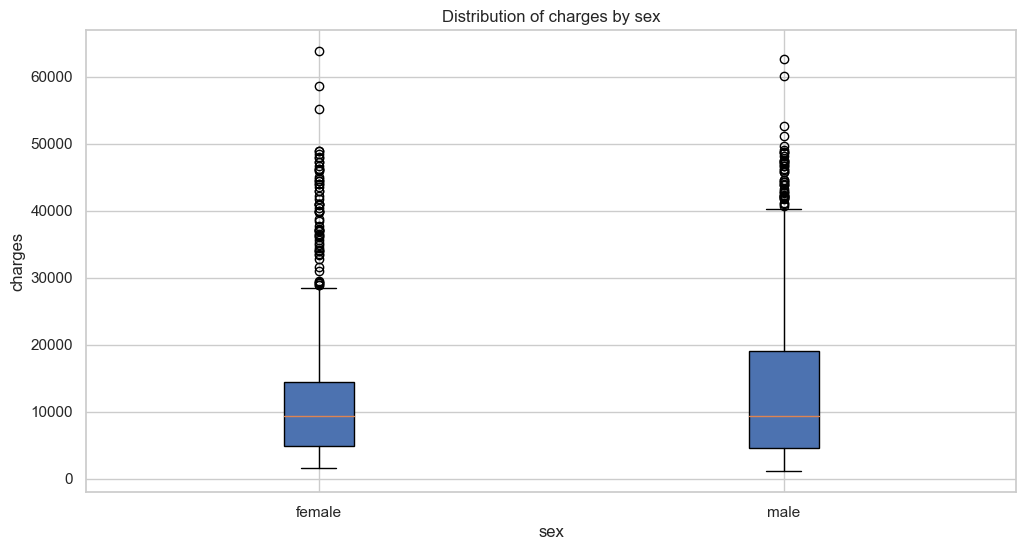

In [37]:
multiboxplot(insurance, "charges", "sex")

As we expected there does not seem to be a meaningful difference between 'male' and 'female' for insurance charges. Their median values are almost exactly the same, and they have similar extreme values. There doesn't seem to be much else we can extract from this comparison, so we will continue on.

## 3.3 bmi and charges

This comparison should yield some interesting results. Does BMI affect insurance charges? Do insurance charges increase as BMI increases? Does the insurance company take BMI into account when calculating insurance charges? Our hypothesis is that as BMI increases, insurance charges also increase. We do expect that the insurance company would take BMI into consideration when calculating insurance charges. 

Because both 'bmi' and 'charges' are continuous numerical variables, our options for visual comparisons are increased. We start with the correlation coefficients.

In [38]:
correlation(insurance, "bmi", "charges")

Correlation coefficients:
r   = 0.19834096883362926 (weak)
rho = 0.11939590358331145 (very weak)


The results are interesting and contrary to our hypothesis. The correlations are weak and very weak, indicating little to no correlation between BMI and insurance charges. 

We can try a visual representatino of the correlation as well. Because we added a column for 'bmi_class' we use this column in our box plots.

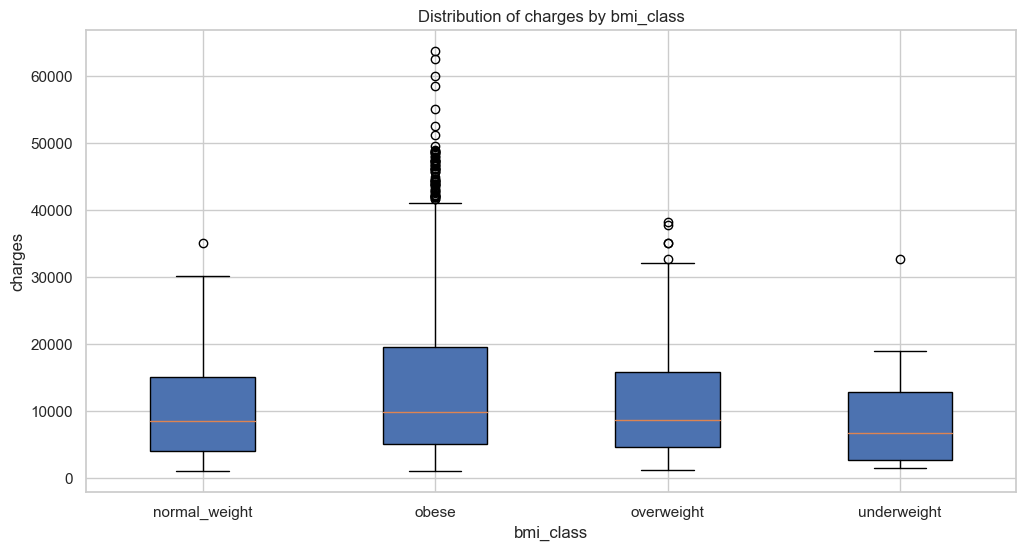

In [39]:
multiboxplot(insurance, "charges", "bmi_class")

The plot above does seem to indicate higher extreme 'charges' values for obese people, as well as a slightly higher median charge for obese people and a slightly lower median charge for underweight people. This chart does seem to indicate some relationship between BMI and insurance charges. However, from what we've seen, it doesn't seem like charges increase steadily with BMI. Instead, it seems possible that higher BMI people are more likely to have health issues that lead to them using their insurance, which in turn increases their insurance charges. This is a different mechanism than the insurance company monitoring a person's BMI and increasing their insurance charges accordingly. This may explain the low correlation numbers and the visual extreme charges for obese people exposed by the multiboxplot.

We can also try a simple scatter plot with a LOESS line. 

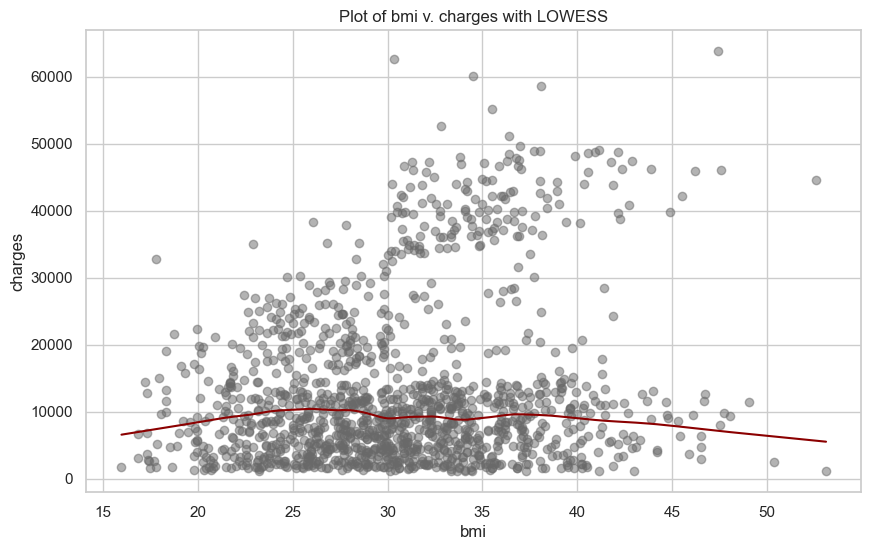

In [40]:
lowess_scatter(insurance, "bmi", "charges", jitter=0.0, skip_lowess=False)

The LOESS line does not show a strong increase in charges with increasing BMI, which is consistent with the correlation coefficients we calculated earlier. There is an interesting clump of values right around the 35 bmi mark around 40000 charges. It is difficult to determine what caused this clump. It is possible that some other factor correlates with 35 bmi people. 

## 3.4 children and charges

Are the 'children' and 'charges' variables correlated? Do charges increase as people have more kids? We expect the number of children someone has to have a very strong correlation with their insurance charges. We expect that as the number of children increases, their insurance charges also increase. We are also interested to see if perhaps the number of children are responsible for the three tiers we saw earlier. Maybe the insurance company has different charge tiers for different numbers of children.

First we try the correlation coefficients.

In [41]:
correlation(insurance, "children", "charges")

Correlation coefficients:
r   = 0.06799822684790453 (very weak)
rho = 0.13333894319168216 (very weak)


We observe a very weak correlation between number of children and insurance charges. This is contrary to our hypothesis that as children increase, so do charges. 

Next we try a visual comparison. We first try a multiboxplot to see if median charges increase with number of children.

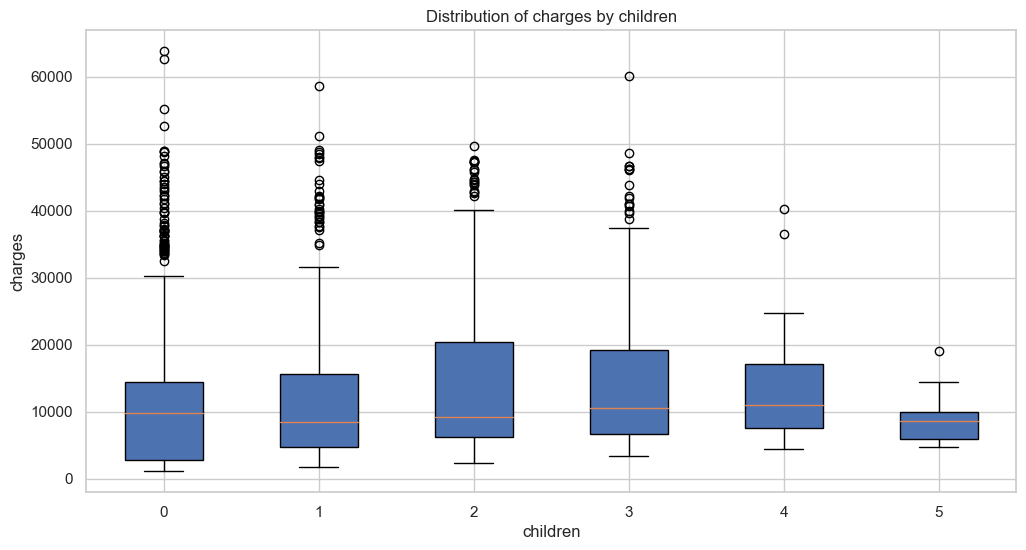

In [42]:
multiboxplot(insurance, "charges", "children")

We see that there is no strong correlation between number of children and charges. There might be an increase from 1 to 4 children, but there is still a decrease from 0 to 1 and from 4 to 5, so the correlation does not seem strong. It might also be the case that the small increase we see is due to age, since people with more children are likely older. 

Next we try a scatter plot with a LOESS line.

/Users/christianznidarsic/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


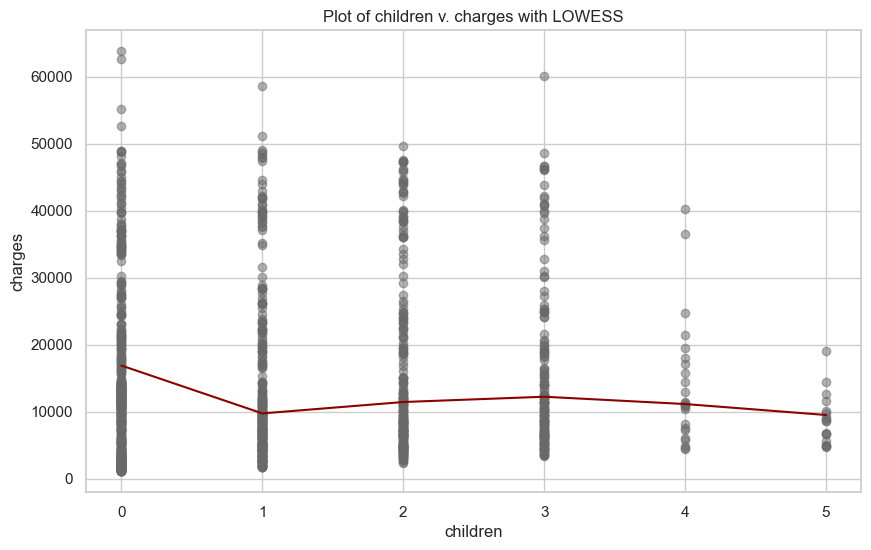

In [43]:
lowess_scatter(insurance, "children", "charges", jitter=0.0, skip_lowess=False)

Again, the plot does not indicate a strong correlation between number of children and insurance charges. The LOESS line does illustrate our observation of the slight increase from 1 to 4, though now it seems as though there is a descrease from 3 to 4 as well. Overall there does not seem to be a big correlation between 'children' and 'charges'.

## 3.5 smoker and charges

We are interested to see if there is a strong correlation between 'smoker' and 'charges'. We would guess that the insurance company would monitor whether someone is a smoker or not. Becuase smokers are at much higher risk of health problems than non-smokers, we guess that if someone is a smoker, they will have much higher insurance charges.

Because 'smoker' is a binary categorical variable, we can't check the correlation coefficients. Instead, we describe by category.

In [44]:
describe_by_category(insurance, "charges", "smoker")

         count     mean      std      min      25%      50%      75%      max
smoker                                                                       
no     1064.00  8434.27  5993.78  1121.87  3986.44  7345.41 11362.89 36910.61
yes     274.00 32050.23 11541.55 12829.46 20826.24 34456.35 41019.21 63770.43


Here we notice stark differences in mean and all other values for insurance charges between smokers and non-smokers. Smokers have much higher insurance charges than non-smokers.

To get a visualization, we use a multiboxplot.

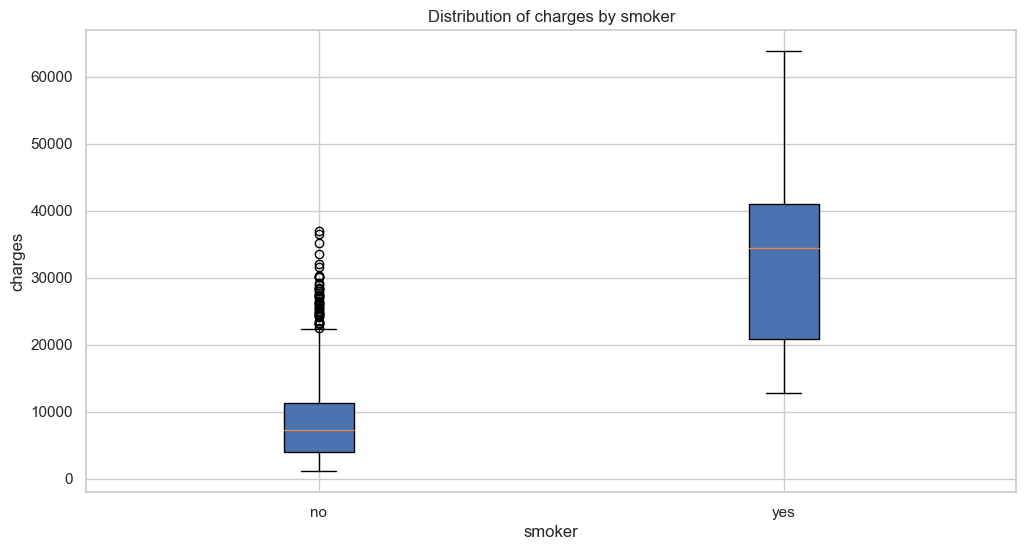

In [45]:
multiboxplot(insurance, "charges", "smoker")

The multiboxplot shows the substantial difference between smokers and non-smokers. Smokers have a far higher median insurance charge than non-smokers. The difference is roughly 30000. We can conclude that the 'smoker' variable greatly influences the 'charges' variable. If someone is a smoker, their insurance charges are likely to be much higher than non-smokers. The difference is clear enough that it seems likely that the insurance company monitors whether someone is a smoker, and adjusts the charges accordingly. Further, it seems likely that the 'smoker' variable is responsible for the tiers we observed earlier. 

## 3.6 region and charges

We don't expect to see a correlation between 'region' and 'charges', but we check anyway. We start by describing the correlation.

In [46]:
describe_by_category(insurance, "charges", "region")

           count     mean      std     min     25%      50%      75%      max
region                                                                       
northeast 324.00 13406.38 11255.80 1694.80 5194.32 10057.65 16687.36 58571.07
northwest 325.00 12417.58 11072.28 1621.34 4719.74  8965.80 14711.74 60021.40
southeast 364.00 14735.41 13971.10 1121.87 4440.89  9294.13 19526.29 63770.43
southwest 325.00 12346.94 11557.18 1241.57 4751.07  8798.59 13462.52 52590.83


We don't notice any strong correlations in the data. There is a slightly larger mean in the southeast, but it is not significant.

We can use a box plot just to be sure we aren't missing anything.

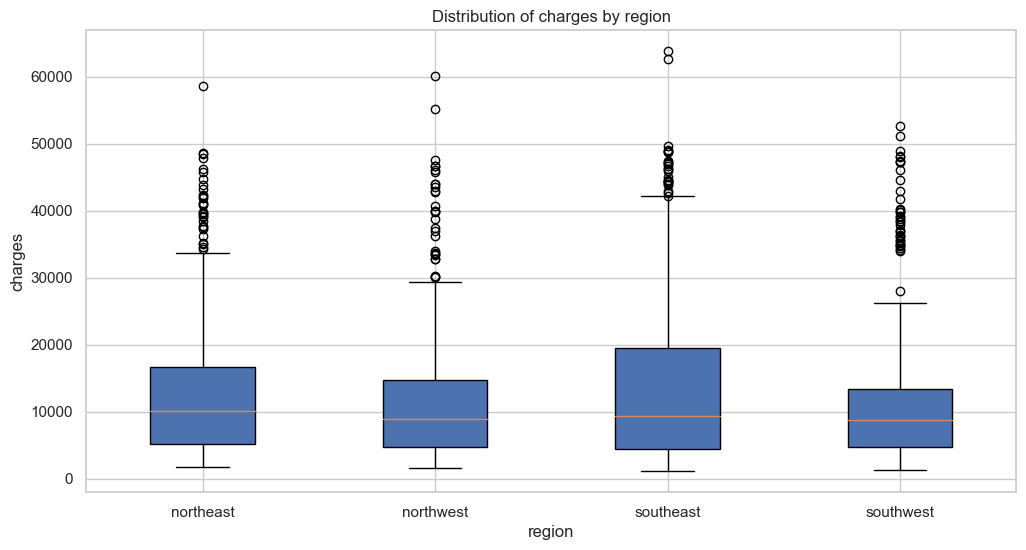

In [47]:
multiboxplot(insurance, "charges", "region")

As we observed above, there does not seem to be a correlation between 'region' and 'charges'.